In [1]:
import os
import json
import pandas as pd
import numpy as np

!pip install requests
import seaborn as sns
import requests

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

!pip install IPython 
from IPython.display import Image

## 데이터 합치기

In [4]:
apikey = '64514c67676b696d33395a46436c56'
file_type = 'json'
service_name = 'BukChonInOutPeopleInfo'

start = 1
end = 1000

all_data = pd.DataFrame()
for i in range(0, 30):
    url = f'http://openapi.seoul.go.kr:8088/{apikey}/{file_type}/BukChonInOutPeopleInfo/{start}/{end}/'
    res = requests.get(url)
    data = res.text
    dict_data = json.loads(data)
    dict_data['BukChonInOutPeopleInfo']
    df = pd.DataFrame(dict_data['BukChonInOutPeopleInfo']['row'])
    all_data = pd.concat([df,all_data])
    start += 1000
    end += 1000
all_data

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,2.0,계동길 69,계동교회 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2600.0,3495.0
1,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2820.0,3291.0
2,2.0,계동길 69,계동교회 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2640.0,3546.0
3,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2857.0,3429.0
4,2.0,계동길 69,계동교회 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2683.0,3599.0
...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0


In [5]:
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,2.0,계동길 69,계동교회 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2600.0,3495.0
1,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2820.0,3291.0
2,2.0,계동길 69,계동교회 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2640.0,3546.0
3,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2857.0,3429.0
4,2.0,계동길 69,계동교회 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2683.0,3599.0
...,...,...,...,...,...,...,...
271,1.0,율곡로3길 50,덕성여고 앞,2023-01-30 15:50:41,2023-01-30 16:00:41,3451.0,2067.0
272,2.0,계동길 69,계동교회 앞,2023-01-30 16:00:41,2023-01-30 16:10:41,2272.0,3522.0
273,1.0,율곡로3길 50,덕성여고 앞,2023-01-30 16:00:41,2023-01-30 16:10:41,3561.0,2162.0
274,2.0,계동길 69,계동교회 앞,2023-01-30 16:10:41,2023-01-30 16:20:41,2299.0,3556.0


## 유입(INCOUNT)이 많은 지역

In [6]:
cctv_df = all_data
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,2.0,계동길 69,계동교회 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2600.0,3495.0
1,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2820.0,3291.0
2,2.0,계동길 69,계동교회 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2640.0,3546.0
3,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2857.0,3429.0
4,2.0,계동길 69,계동교회 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2683.0,3599.0
...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0


In [7]:
cctv_df['DESCRIPTION'].value_counts()

계동교회 앞       13683
덕성여고 앞       12020
삼청파출소 사잇길     3573
Name: DESCRIPTION, dtype: int64

In [8]:
max_incount = cctv_df.groupby('DESCRIPTION')['INCOUNT','OUTCOUNT'].mean()
max_incount

,INCOUNT,OUTCOUNT
DESCRIPTION,,
계동교회 앞,4821.513118,6006.208945
덕성여고 앞,2772.278536,2074.883195
삼청파출소 사잇길,1913.283515,2298.534845


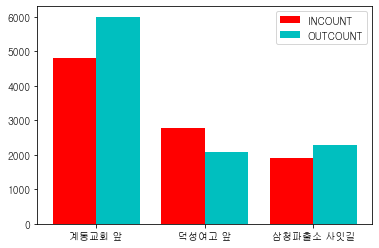

In [9]:
# 한글 폰트 사용을 위해서 세팅(안하면 한글 꺠짐)
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
bar_width = 0.4
label = ['계동교회 앞','덕성여고 앞','삼청파출소 사잇길']
index = np.arange(len(label))
plt.bar(index, max_incount['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, max_incount['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.legend()
plt.xticks(index+0.2, label)
plt.show()

## 언제 유동인구가 많은가 (월)

In [10]:
cctv_df = all_data
cctv_df['ENDTIME'] = pd.to_datetime(cctv_df['ENDTIME'])

cctv_df['MONTH'] = cctv_df['ENDTIME'].dt.month
cctv_df['WEEK'] = cctv_df['ENDTIME'].dt.day_name()
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,WEEK
0,2.0,계동길 69,계동교회 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2600.0,3495.0,1,Sunday
1,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2820.0,3291.0,1,Sunday
2,2.0,계동길 69,계동교회 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2640.0,3546.0,1,Sunday
3,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2857.0,3429.0,1,Sunday
4,2.0,계동길 69,계동교회 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2683.0,3599.0,1,Sunday
...,...,...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10,Friday
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10,Friday
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10,Friday
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0,10,Friday


In [11]:
count_MaxMin = cctv_df.groupby(['MONTH'])['INCOUNT', 'OUTCOUNT'].mean()
count_MaxMin

,INCOUNT,OUTCOUNT
MONTH,,
1,2332.755744,2542.924708
10,6206.330769,6714.802797
11,5182.404916,5709.187119
12,2602.283764,2733.625183


<AxesSubplot:xlabel='MONTH', ylabel='INCOUNT'>

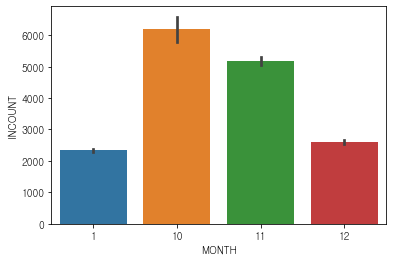

In [12]:
sns.barplot(data = cctv_df, x = 'MONTH', y = 'INCOUNT')

<AxesSubplot:xlabel='MONTH', ylabel='OUTCOUNT'>

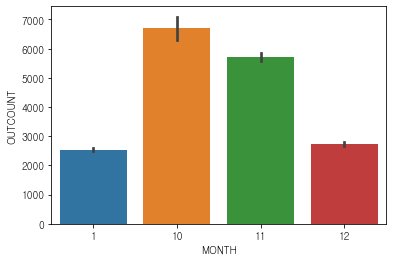

In [14]:
sns.barplot(data = cctv_df, x = 'MONTH', y = 'OUTCOUNT')

<AxesSubplot:xlabel='MONTH', ylabel='INCOUNT'>

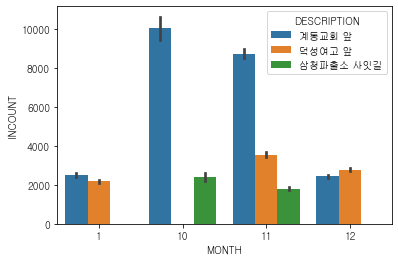

In [15]:
sns.barplot(data = cctv_df, x = 'MONTH', y = 'INCOUNT', hue = 'DESCRIPTION')

<AxesSubplot:xlabel='MONTH', ylabel='OUTCOUNT'>

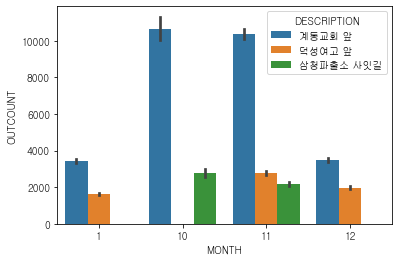

In [16]:
sns.barplot(data = cctv_df, x = 'MONTH', y = 'OUTCOUNT', hue = 'DESCRIPTION')

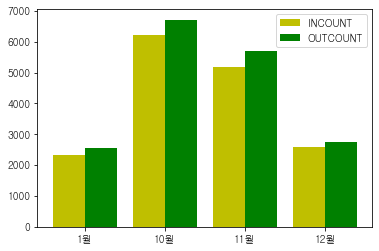

In [18]:
bar_width = 0.4
label = ['1월','10월','11월','12월']
index = np.arange(len(label))
plt.bar(index, count_MaxMin['INCOUNT'], color ='y', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, count_MaxMin['OUTCOUNT'], color = 'g',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, label)
plt.legend()
plt.show()

## 언제 유동인구가 많은가 (몇 시)

In [21]:
when = mon = df['RECORD'].str.split(" ", expand = True)
df['WHEN'] = when[1]
hour = df['WHEN'].str.split(':', expand = True)
df['WHEN'] = hour[0]
#WHEN 변수 만들기
df.sort_values(by = 'WHEN', inplace = True)

<AxesSubplot:xlabel='WHEN', ylabel='INCOUNT'>

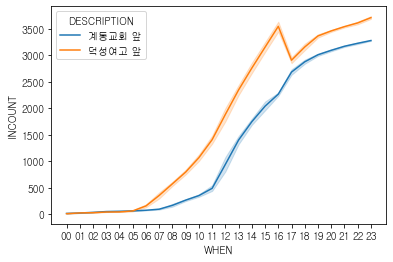

In [22]:
sns.lineplot(data = df, x = 'WHEN', y = 'INCOUNT', hue = 'DESCRIPTION')

<AxesSubplot:xlabel='WHEN', ylabel='OUTCOUNT'>

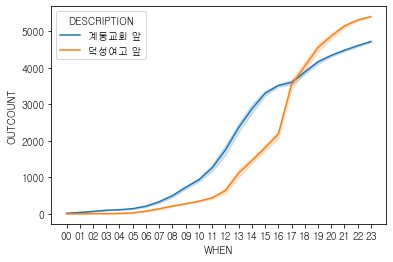

In [23]:
sns.lineplot(data = df, x = 'WHEN', y = 'OUTCOUNT', hue = 'DESCRIPTION')

## 장소별 인구 최댓값

In [24]:
cctv_df['TOTAL'] = cctv_df['INCOUNT'] + cctv_df['OUTCOUNT']
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,WEEK,TOTAL
0,2.0,계동길 69,계동교회 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2600.0,3495.0,1,Sunday,6095.0
1,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2820.0,3291.0,1,Sunday,6111.0
2,2.0,계동길 69,계동교회 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2640.0,3546.0,1,Sunday,6186.0
3,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2857.0,3429.0,1,Sunday,6286.0
4,2.0,계동길 69,계동교회 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2683.0,3599.0,1,Sunday,6282.0
...,...,...,...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10,Friday,6261.0
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10,Friday,32516.0
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10,Friday,6533.0
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0,10,Friday,32981.0


In [25]:
count_totalMax = cctv_df.groupby(['DESCRIPTION'])['TOTAL'].max()
count_totalMax

DESCRIPTION
계동교회 앞       54730.0
덕성여고 앞       24402.0
삼청파출소 사잇길    21006.0
Name: TOTAL, dtype: float64

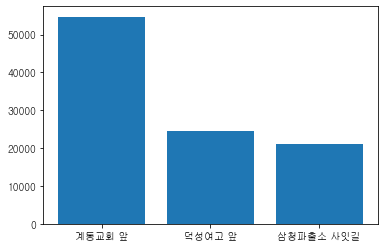

In [26]:
label = ['계동교회 앞','덕성여고 앞','삼청파출소 사잇길']
plt.bar(label,count_totalMax)
plt.show()

## 월별 최대 인구 수

In [27]:
Mcount_totalMax = cctv_df.groupby(['MONTH'])['TOTAL'].max()
Mcount_totalMax

MONTH
1     25617.0
10    46848.0
11    54730.0
12    26224.0
Name: TOTAL, dtype: float64

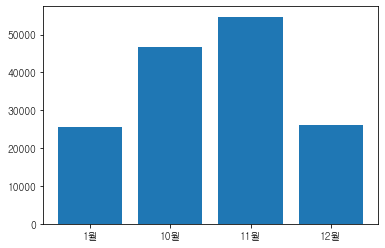

In [28]:
label = ['1월','10월','11월','12월']
plt.bar(label,Mcount_totalMax)
plt.show()

## 월별 평균 인구수

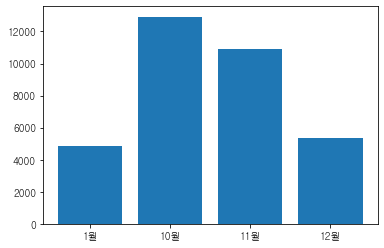

In [29]:
Mcount_totalmean = cctv_df.groupby(['MONTH'])['TOTAL'].mean()
Mcount_totalmean
label = ['1월','10월','11월','12월']
plt.bar(label,Mcount_totalmean)
plt.show()

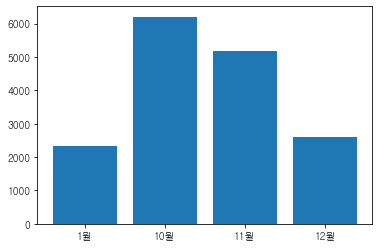

In [30]:
Mcount_incountmean = cctv_df.groupby(['MONTH'])['INCOUNT'].mean()
Mcount_incountmean
label = ['1월','10월','11월','12월']
plt.bar(label,Mcount_incountmean)
plt.show()

## 시간대별 분포

In [31]:
cctv_df['HOUR'] = cctv_df['ENDTIME'].dt.hour
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,WEEK,TOTAL,HOUR
0,2.0,계동길 69,계동교회 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2600.0,3495.0,1,Sunday,6095.0,17
1,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2820.0,3291.0,1,Sunday,6111.0,17
2,2.0,계동길 69,계동교회 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2640.0,3546.0,1,Sunday,6186.0,17
3,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2857.0,3429.0,1,Sunday,6286.0,17
4,2.0,계동길 69,계동교회 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2683.0,3599.0,1,Sunday,6282.0,17
...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10,Friday,6261.0,15
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10,Friday,32516.0,15
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10,Friday,6533.0,15
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0,10,Friday,32981.0,15


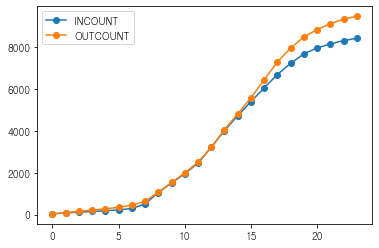

In [32]:
Hcount_IncountMean = cctv_df.groupby(['HOUR'])['INCOUNT'].mean()
Hcount_OutcountMean = cctv_df.groupby(['HOUR'])['OUTCOUNT'].mean()
hours = np.arange(0, 24)
plt.plot(hours,Hcount_IncountMean, marker = 'o')
plt.plot(hours, Hcount_OutcountMean, marker = 'o')
plt.legend(['INCOUNT','OUTCOUNT'])
plt.show()

## 요일별 유동 인구

In [33]:
cctv_df['ENDTIME'] = pd.to_datetime(cctv_df['ENDTIME'])
cctv_df['WEEKDAY'] = cctv_df['ENDTIME'].dt.weekday
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,WEEK,TOTAL,HOUR,WEEKDAY
0,2.0,계동길 69,계동교회 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2600.0,3495.0,1,Sunday,6095.0,17,6
1,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2820.0,3291.0,1,Sunday,6111.0,17,6
2,2.0,계동길 69,계동교회 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2640.0,3546.0,1,Sunday,6186.0,17,6
3,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2857.0,3429.0,1,Sunday,6286.0,17,6
4,2.0,계동길 69,계동교회 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2683.0,3599.0,1,Sunday,6282.0,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10,Friday,6261.0,15,4
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10,Friday,32516.0,15,4
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10,Friday,6533.0,15,4
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0,10,Friday,32981.0,15,4


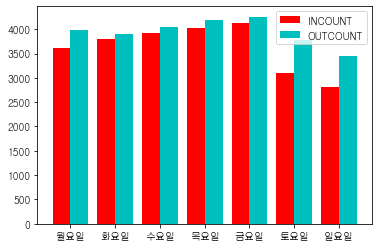

In [34]:
Wcount_countMean = cctv_df.groupby(['WEEKDAY'])['INCOUNT','OUTCOUNT'].mean()
bar_width = 0.4
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
index = np.arange(len(days))
plt.bar(index, Wcount_countMean['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Wcount_countMean['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, days)
plt.legend()
plt.show()

In [35]:
Wcount_countMinMax = cctv_df.groupby(['WEEKDAY'])['TOTAL'].max()
Wcount_countMinMax

WEEKDAY
0    46936.0
1    48714.0
2    54730.0
3    49032.0
4    46834.0
5    44065.0
6    46841.0
Name: TOTAL, dtype: float64

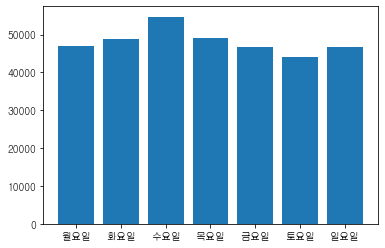

In [36]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
index = np.arange(len(days))
plt.bar(index, Wcount_countMinMax)
plt.xticks(index, days)
plt.show()

## 계동교회 앞 월별, 시간별, 요일별 그래프

In [37]:
G_chruch = cctv_df.loc[cctv_df['DESCRIPTION'] == '계동교회 앞',:]
G_chruch

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,WEEK,TOTAL,HOUR,WEEKDAY
0,2.0,계동길 69,계동교회 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2600.0,3495.0,1,Sunday,6095.0,17,6
2,2.0,계동길 69,계동교회 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2640.0,3546.0,1,Sunday,6186.0,17,6
4,2.0,계동길 69,계동교회 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2683.0,3599.0,1,Sunday,6282.0,17,6
6,2.0,계동길 69,계동교회 앞,2023-01-29 17:30:40,2023-01-29 17:40:40,2737.0,3657.0,1,Sunday,6394.0,17,6
8,2.0,계동길 69,계동교회 앞,2023-01-29 17:40:40,2023-01-29 17:50:40,2772.0,3716.0,1,Sunday,6488.0,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...
990,2.0,계동길 69,계동교회 앞,2022-10-28 14:40:42,2022-10-28 14:50:42,15301.0,15649.0,10,Friday,30950.0,14,4
992,2.0,계동길 69,계동교회 앞,2022-10-28 14:50:42,2022-10-28 15:00:42,15551.0,15916.0,10,Friday,31467.0,15,4
994,2.0,계동길 69,계동교회 앞,2022-10-28 15:00:42,2022-10-28 15:10:42,15820.0,16198.0,10,Friday,32018.0,15,4
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10,Friday,32516.0,15,4


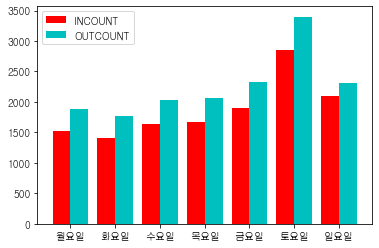

In [62]:
Gcount_countMean = G_chruch.groupby(['WEEKDAY'])['INCOUNT','OUTCOUNT'].mean()
bar_width = 0.4
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
index = np.arange(len(days))
plt.bar(index, Gcount_countMean['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Gcount_countMean['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, days)
plt.legend()
plt.show()

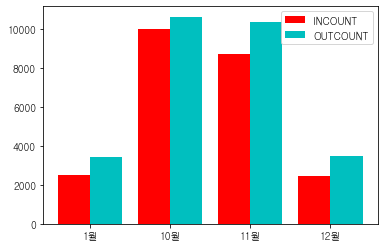

In [39]:
Gcount_MaxMin = G_chruch.groupby(['MONTH'])['INCOUNT', 'OUTCOUNT'].mean()
bar_width = 0.4
label = ['1월','10월','11월','12월']
index = np.arange(len(label))
plt.bar(index, Gcount_MaxMin['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Gcount_MaxMin['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, label)
plt.legend()
plt.show()

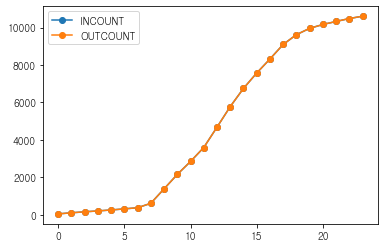

In [40]:
Gcount_IncountMean = G_chruch.groupby(['HOUR'])['INCOUNT'].mean()
Gcount_OutcountMean = G_chruch.groupby(['HOUR'])['OUTCOUNT'].mean()
hours = np.arange(0, 24)
plt.plot(hours,Gcount_IncountMean, marker = 'o')
plt.plot(hours, Gcount_IncountMean, marker = 'o')
plt.legend(['INCOUNT','OUTCOUNT'])
plt.show()

## 삼청파출소 사잇길 월별, 시간별, 요일별 그래프

In [48]:
G_police = cctv_df.loc[cctv_df['DESCRIPTION'] == '삼청파출소 사잇길',:]
G_police

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,WEEK,TOTAL,HOUR,WEEKDAY
1,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-19 11:10:42,2022-11-19 11:20:42,646.0,1027.0,11,Saturday,1673.0,11,5
4,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-19 11:20:42,2022-11-19 11:30:42,686.0,1126.0,11,Saturday,1812.0,11,5
7,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-19 11:30:42,2022-11-19 11:40:42,758.0,1218.0,11,Saturday,1976.0,11,5
10,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-19 11:40:42,2022-11-19 11:50:42,809.0,1325.0,11,Saturday,2134.0,11,5
13,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-11-19 11:50:42,2022-11-19 12:00:42,845.0,1404.0,11,Saturday,2249.0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...
991,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 14:40:42,2022-10-28 14:50:42,2730.0,3085.0,10,Friday,5815.0,14,4
993,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 14:50:42,2022-10-28 15:00:42,2826.0,3222.0,10,Friday,6048.0,15,4
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10,Friday,6261.0,15,4
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10,Friday,6533.0,15,4


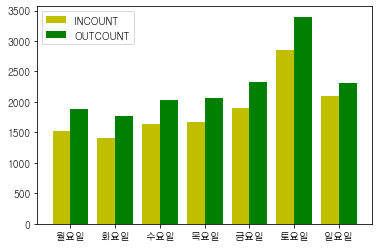

In [49]:
Gcount_countMean = G_police.groupby(['WEEKDAY'])['INCOUNT','OUTCOUNT'].mean()
bar_width = 0.4
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
index = np.arange(len(days))
plt.bar(index, Gcount_countMean['INCOUNT'], color ='y', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Gcount_countMean['OUTCOUNT'], color = 'g',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, days)
plt.legend()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (2,).

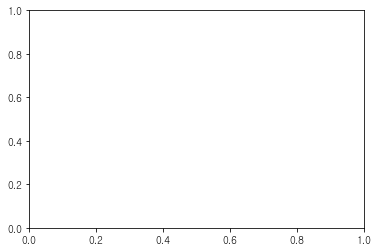

In [50]:
Gcount_MaxMin = G_police.groupby(['MONTH'])['INCOUNT', 'OUTCOUNT'].mean()
label = ['1월','10월','11월','12월']
index = np.arange(len(label))
plt.bar(index, Gcount_MaxMin['INCOUNT'], color ='y', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Gcount_MaxMin['OUTCOUNT'], color = 'g',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, label)
plt.legend()
plt.show()

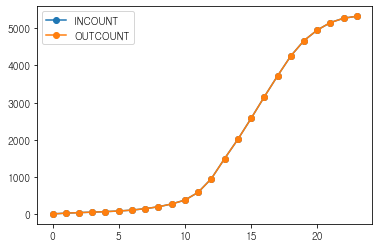

In [51]:
Gcount_IncountMean = G_police.groupby(['HOUR'])['INCOUNT'].mean()
Gcount_OutcountMean = G_police.groupby(['HOUR'])['OUTCOUNT'].mean()
hours = np.arange(0, 24)
plt.plot(hours,Gcount_IncountMean, marker = 'o')
plt.plot(hours, Gcount_IncountMean, marker = 'o')
plt.legend(['INCOUNT','OUTCOUNT'])
plt.show()

## 덕성여고 앞 사잇길 월별, 시간별, 요일별 그래프

In [53]:
G_school = cctv_df.loc[cctv_df['DESCRIPTION'] == '덕성여고 앞',:]
G_school

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,WEEK,TOTAL,HOUR,WEEKDAY
1,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:00:40,2023-01-29 17:10:40,2820.0,3291.0,1,Sunday,6111.0,17,6
3,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:10:40,2023-01-29 17:20:40,2857.0,3429.0,1,Sunday,6286.0,17,6
5,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:20:40,2023-01-29 17:30:40,2912.0,3584.0,1,Sunday,6496.0,17,6
7,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:30:40,2023-01-29 17:40:40,2956.0,3670.0,1,Sunday,6626.0,17,6
9,1.0,율곡로3길 50,덕성여고 앞,2023-01-29 17:40:40,2023-01-29 17:50:40,3007.0,3748.0,1,Sunday,6755.0,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...
875,1.0,율곡로3길 50,덕성여고 앞,2022-12-08 23:30:41,2022-12-08 23:40:41,8930.0,6837.0,12,Thursday,15767.0,23,3
877,1.0,율곡로3길 50,덕성여고 앞,2022-12-09 03:00:41,2022-12-09 03:10:41,105.0,26.0,12,Friday,131.0,3,4
879,1.0,율곡로3길 50,덕성여고 앞,2022-12-09 05:10:42,2022-12-09 05:20:42,148.0,58.0,12,Friday,206.0,5,4
883,1.0,율곡로3길 50,덕성여고 앞,2022-12-01 08:50:41,2022-12-01 09:00:41,1702.0,448.0,12,Thursday,2150.0,9,3


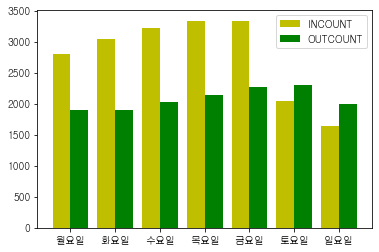

In [55]:
Gcount_countMean = G_school.groupby(['WEEKDAY'])['INCOUNT','OUTCOUNT'].mean()
bar_width = 0.4
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
index = np.arange(len(days))
plt.bar(index, Gcount_countMean['INCOUNT'], color ='y', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Gcount_countMean['OUTCOUNT'], color = 'g',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, days)
plt.legend()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3,).

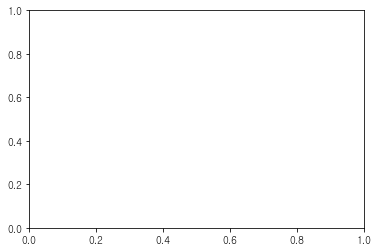

In [60]:
Gcount_MaxMin = G_school.groupby(['MONTH'])['INCOUNT', 'OUTCOUNT'].mean()
bar_width = 0.4
label = ['1월','10월','11월','12월']
index = np.arange(len(label))
plt.bar(index, Gcount_MaxMin['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Gcount_MaxMin['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, label)
plt.legend()
plt.show()

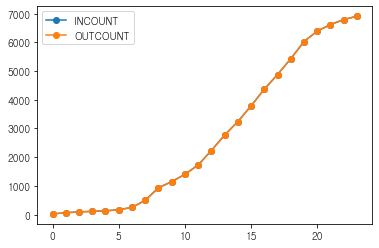

In [58]:
Gcount_IncountMean = G_school.groupby(['HOUR'])['INCOUNT'].mean()
Gcount_OutcountMean = G_school.groupby(['HOUR'])['OUTCOUNT'].mean()
hours = np.arange(0, 24)
plt.plot(hours,Gcount_IncountMean, marker = 'o')
plt.plot(hours, Gcount_IncountMean, marker = 'o')
plt.legend(['INCOUNT','OUTCOUNT'])
plt.show()